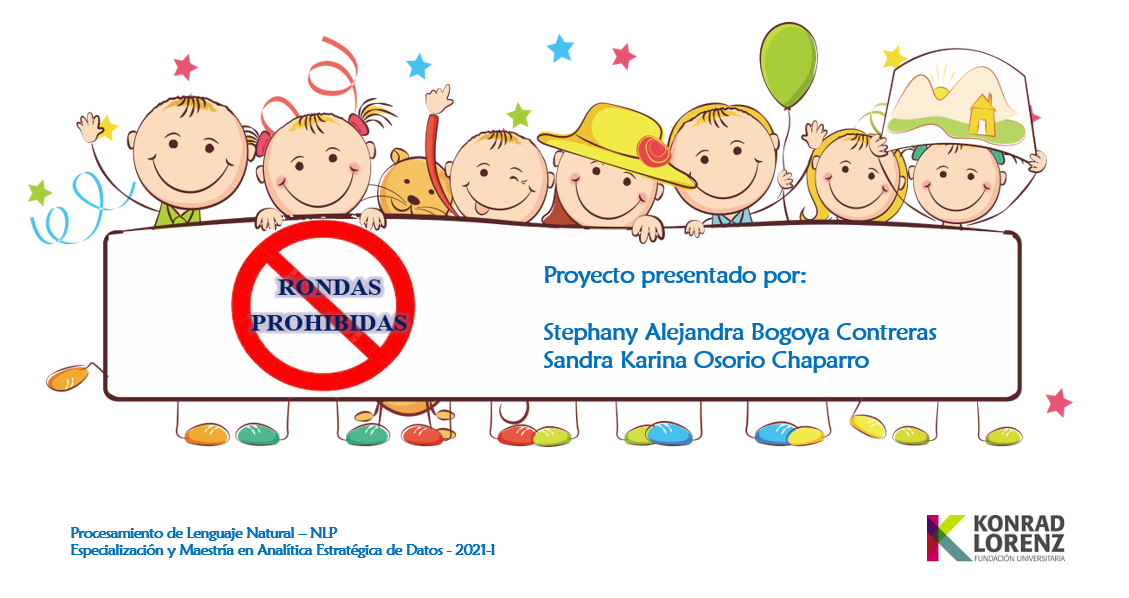

# Web Scraping

* **Requests**: Permite descargar páginas web en Python.

* **Beautiful Soup**: Ayuda a procesar los contenidos de una página web de manera fácil.


  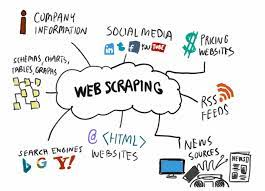

#### Cargar Librerías y colores

In [31]:
import pandas as pd
import numpy as np
import re 
import sys
import json
import warnings
import glob

# Web Scraping

import urllib.request
import bs4 as bs
from bs4 import NavigableString, Tag
from pprint import pprint

# BoW

import re
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

# Modelado de Temas

import pyLDAvis as p
import pyLDAvis.gensim_models
from gensim.models import LdaModel
from gensim.corpora import Dictionary

   
# Nube de palabra 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator      

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [32]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91###  `[6 pts]` Punto 3: Entrenar modelo con el $K$ escogidom'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    

#### Extraer datos de las páginas web

In [33]:
infantiles= ['https://www.guiainfantil.com/servicios/musica/Canciones/mambru.htm',
            'https://www.guiainfantil.com/articulos/ocio/canciones-infantiles/en-un-bosque-de-la-china-cancion-de-enrique-y-ana-para-los-ninos/',
            'https://www.guiainfantil.com/servicios/musica/Canciones/al_pasar_la_barca.htm',
            'https://www.guiainfantil.com/articulos/ocio/canciones-infantiles/aserrin-aserran-canciones-populares-para-ninos/',
            'https://www.guiainfantil.com/articulos/ocio/canciones-infantiles/arroz-con-leche-cancion-para-ninos/'
            ]


In [34]:
lista = []

for i, enlace in enumerate(infantiles):    
    print(f"{color.PURPLE}{color.BOLD}----------------------------------------- RONDA {i} -----------------------------------------{color.END}")
    print(f"{color.PURPLE}{color.BOLD}Enlace #{i+1:<2}: {enlace}{color.END}")
    print()
   
    request = urllib.request.Request(enlace, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urllib.request.urlopen(request)
    source = webpage.read()
    webpage.close()

    soup = bs.BeautifulSoup(source, 'html.parser')
   
    for tag in soup.find(class_='post-body').find('h2').next_siblings:
        if tag.name!='p':
            continue
        if isinstance(tag, NavigableString):
            continue
        if isinstance(tag, Tag):
            for br in tag.findAll('br'):
                tag.find('br').replaceWith(' ')
            print(tag.get_text()) 
            lista.append(tag.text)
            

----------------------------------------- RONDA 0 -----------------------------------------
Enlace #1 : https://www.guiainfantil.com/servicios/musica/Canciones/mambru.htm


Mambrú se fue a la guerra,   que dolor, que dolor, que pena.   Mambrú se fue a la guerra,   no sé cuándo vendrá.   Do-re-mi, do-re-fa.   No sé cuándo vendrá.
Si vendrá por la Pascua,   mire usted, mire usted, qué gracia.   Si vendrá por la Pascua   por la Trinidad.   Do-re-mi, do-re-fa.   O por la Trinidad.    La Trinidad se pasa,   mire usted, mire usted, qué guasa.   La Trinidad se pasa.   Mambrú no viene ya,   Do-re-mi, do-re-fa.   Mambrú no viene ya.    Por allí viene un paje,   ¡qué dolor, qué dolor, qué traje!   por allí viene un paje,   ¿qué noticias traerá?   Do-re-mi, do-re-fa,   ¿qué noticias traerá?    Las noticias que traigo,   ¡del dolor, del dolor me caigo!   las noticias que traigo   son tristes de contar,   Do-re-mi, do-re-fa,   son tristes de contar.    Que Mambrú ya se ha muerto,   ¡qué dolor, qué 

#### Extracción Otras páginas 

In [35]:
link = "http://biblioaguiar.blogspot.com/2013/11/don-federico-mato-su-mujer.html"

request = urllib.request.Request(link, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urllib.request.urlopen(request)
source = webpage.read()
webpage.close()

soup1 = bs.BeautifulSoup(source, 'html.parser')


In [36]:
Federico = soup1.find('iframe').findNext('br') 

while True:
    print(Federico.find('br').get_text())
    init = Federico.findNext('p')
    break
    



Don Federico mató a su mujer.
La hizo picadillo.
La puso en la sartén.
La gente que pasaba
olía a carne asada.
Era la mujer de Don Federico.
Don Federico perdió su cartera
para casarse con la costurera.
La costurera perdió su dedal
para casarse con el general.
El general perdió su espada
para casarse con una bella dama.
La bella dama perdió su abanico
para casarse con Don Federico.
Don Federico perdió su ojo
para casarse con un piojo.
El piojo perdió su cola
para casarse con una Pepsi Cola.
La Pepsi-Cola perdió sus burbujas
para casarse con una mala bruja.
La mala bruja perdió su gatito
para casarse con Don Federico.
Don Federico le dijo que no
y la mala bruja se desmayó.
Al cabo de 3 días le dijo regular
y la mala bruja se puso a llorar.
Al cabo de 3 meses le dijo que sí
y la mala bruja le dijo por aquí.




# Resultado

In [68]:
rondasi = pd.read_excel(r'C:\Users\user\Documents\ESPECIALIZACION\LNP\Archivos\Ronda.xlsx')
print(f"Tenemos {rondas.shape[0]:,d} Rondas.")

rondasi.head()


Tenemos 10 Rondas.


LETRA
0  Mambrú se fue a la guerra, que dolor, que dolo...
1  En el bosque de la China, la chinita se perdió...
2  Al pasar la barca me dijo el barquero las niña...
3  Aserrín aserrán los maderos de San Juan piden ...
4  lunes antes de almorzar, una niña fue a jugar ...

In [69]:
print(f"Tenemos {rondas.shape[0]:,d} Rondas.")
rondasi


Tenemos 10 Rondas.


LETRA
0  Mambrú se fue a la guerra, que dolor, que dolo...
1  En el bosque de la China, la chinita se perdió...
2  Al pasar la barca me dijo el barquero las niña...
3  Aserrín aserrán los maderos de San Juan piden ...
4  lunes antes de almorzar, una niña fue a jugar ...
5  Arroz con leche me quiero casar con una señori...
6  Don Federico mató a su mujer, la hizo picadill...
7  Toño retoño mató a su mujer, con un cuchillito...
8  Me subo a la cama, tiro mi maleta, rompo una b...
9  Duérmete niño, duérmete ya que viene el coco y...

## Pre-procesamiento y normalización de textos

* Transformar las palabras a minúscula
* Eliminar caracteres especiales y números
* Tokenizar
* Eliminar palabras vacías


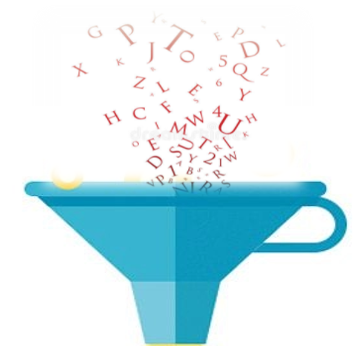

In [77]:
stopwords = (stopwords.words('spanish'))
stopwords.extend(["Mambrú", "Do", "do", "re", "mi", "fa", "China", "china", "bosque", "Aserrín", "aserrán","así", "si", "Leía", "pio", "pa", "la", "de", "vi", "y"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

rondasi['pre_procesamiento'] = rondasi['LETRA'].apply(lambda texto: pre_procesado(texto))
rondasi.head(3)


LETRA  \
0  Mambrú se fue a la guerra, que dolor, que dolo...   
1  En el bosque de la China, la chinita se perdió...   
2  Al pasar la barca me dijo el barquero las niña...   

                                   pre_procesamiento  
0  mambrú guerra dolor dolor pena mambrú guerra s...  
1  chinita perdió andaba perdido encontramos dos ...  
2  pasar barca dijo barquero niñas bonitas pagan ...

In [80]:
Counter(rondasi['pre_procesamiento'].str.cat(sep=" ").split()).most_common(10)


[('jugar', 15),
 ('dolor', 14),
 ('piden', 9),
 ('junto', 8),
 ('niña', 8),
 ('dan', 8),
 ('pasar', 7),
 ('almorzar', 7),
 ('pudo', 7),
 ('mambrú', 6)]

# Representación Vectorial - Bag of Words (BoW)

* Representa el texto como una bolsa de palabras (ignorando orden y contexto)
* Si dos piezas de texto tienen casi las mismas palabras, entonces pertenecen a la misma bolsa

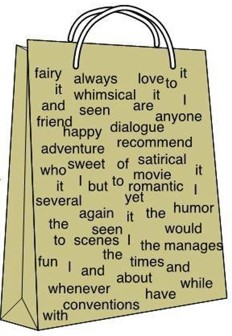

In [23]:
count_vect = CountVectorizer()
bow_rep = count_vect.fit_transform(rondas['pre_procesamiento'].values)
rondas['bow'] = [bow.toarray() for bow in bow_rep]
rondas


LETRA  \
0  Mambrú se fue a la guerra, que dolor, que dolo...   
1  En el bosque de la China, la chinita se perdió...   
2  Al pasar la barca me dijo el barquero las niña...   
3  Aserrín aserrán los maderos de San Juan piden ...   
4  lunes antes de almorzar, una niña fue a jugar ...   
5  Arroz con leche me quiero casar con una señori...   
6  Don Federico mató a su mujer, la hizo picadill...   
7  Toño retoño mató a su mujer, con un cuchillito...   
8  Me subo a la cama, tiro mi maleta, rompo una b...   
9  Duérmete niño, duérmete ya que viene el coco y...   

                                   pre_procesamiento  \
0  mambrú guerra dolor dolor pena mambrú guerra s...   
1  chinita perdió andaba perdido encontramos dos ...   
2  pasar barca dijo barquero niñas bonitas pagan ...   
3  aserrín maderos san juan piden pan dan piden q...   
4  lunes almorzar niña jugar pudo jugar lavar lav...   
5  arroz leche quiero casar señorita ciudad sepa ...   
6  don federico mató mujer hizo picadillo paso sa...   
7  toño retoño mató mujer cuchillito grande saco ...   
8  subo cama tiro maleta rompo botella mamá pega ...   
9          duérmete niño duérmete viene coco llevará   

                                                 bow  
0  [[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1  [[0, 0, 0, 0, 0, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0,...  
2  [[0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0,...  
3  [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0,...  
4  [[0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,...  
5  [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...  
6  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...  
7  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
8  [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
9  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

In [24]:
print(f' El vocabulario tiene un total de: {color.PURPLE}{color.BOLD}{len(count_vect.vocabulary_)} palabras{color.END}')


 El vocabulario tiene un total de: 192 palabras


# Modelo Word2Vec

* Deriva el significado de una palabra por su contexto. 

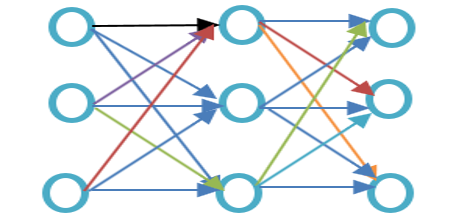

In [49]:
rondas2 = pd.read_excel(r'C:\Users\user\Documents\ESPECIALIZACION\LNP\Archivos\Ronda.xlsx')

In [50]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto.split()

rondas2['preprocesamiento'] = rondas2['LETRA'].apply(lambda texto: pre_procesado(texto))
rondas2.head(3)

LETRA  \
0  Mambrú se fue a la guerra, que dolor, que dolo...   
1  En el bosque de la China, la chinita se perdió...   
2  Al pasar la barca me dijo el barquero las niña...   

                                    preprocesamiento  
0  [mambrú, guerra, dolor, dolor, pena, mambrú, g...  
1  [bosque, china, chinita, perdió, andaba, perdi...  
2  [pasar, barca, dijo, barquero, niñas, bonitas,...

In [51]:
import gensim
import platform

print(f"Versión de Python {platform.python_version()}")
print(f"Versión de Gensim {gensim.__version__}")

Versión de Python 3.8.8
Versión de Gensim 4.0.1


In [52]:
import gensim.models.word2vec as w2v


In [53]:
%%time

mi_modelo = w2v.Word2Vec(rondas2['preprocesamiento'].values,
                        sg=0, # 1 para usar skip-gram, 0 para usar CBOW
                        seed=3, # 1 para tener resultados reproducibles y debuggear
                        vector_size=512, # tamaño de los vectores 
                        min_count=3, # mínimo de veces que ha de aparecer una palabra para ser considerada
                        window=12, # ventana contextual de cada palabra
                        )


Wall time: 43.3 ms


# Resultado

In [54]:
mi_modelo.wv.most_similar("jugar")


[('planchaba', 0.16321972012519836),
 ('noticias', 0.16063706576824188),
 ('do', 0.1263023316860199),
 ('pío', 0.12446431070566177),
 ('chinita', 0.11635970324277878),
 ('re', 0.11109728366136551),
 ('barría', 0.10916642099618912),
 ('bailaba', 0.10547233372926712),
 ('rezaba', 0.10324662178754807),
 ('viene', 0.10221374779939651)]

In [55]:
mi_modelo.wv.most_similar("dolor")


[('barca', 0.14112702012062073),
 ('así', 0.13144376873970032),
 ('lavaba', 0.12953494489192963),
 ('re', 0.11605064570903778),
 ('pasar', 0.1084270104765892),
 ('rezaba', 0.10342194139957428),
 ('dijo', 0.10190153867006302),
 ('fa', 0.09768213331699371),
 ('niña', 0.0908936858177185),
 ('rato', 0.07838688045740128)]

# Similitud

In [56]:
def similitud(inicio1, fin1, inicio2):
    fin2 = mi_modelo.wv.most_similar_cosmul(
    positive=[inicio2, inicio1],
    negative=[fin1])[0][0]
    return f"{inicio1} es a {fin1} como {inicio2} es a {fin2}"

similitud("niña", "jugar", "mujer")


'niña es a jugar como mujer es a juan'

# Agrupación de Textos con K-Means - Clustering

* Modelo de Machine Learning NO supervisado de agrupación por partición

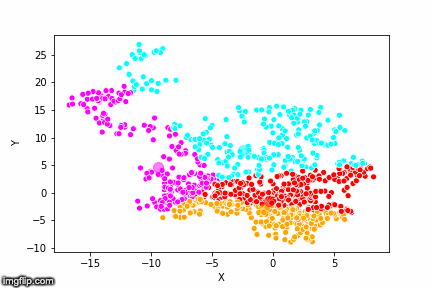

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [147]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords.extend(["Mambrú", "Do", "do", "re", "mi", "fa", "China", "china", "bosque", "Aserrín", "aserrán","así", "si", "Leía", "pío", "pa", "la", "de", "y"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(rondasi.LETRA.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())


In [148]:
k = 3
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)


KMeans(n_clusters=3)

In [149]:
rondas['cluster'] = model.labels_
rondas.head(3)


LETRA  \
0  Mambrú se fue a la guerra, que dolor, que dolor, que pena. Mambrú se fue a la guerra, no sé cuándo vendrá. Do-re-mi, do-re-fa. No sé cuándo vendrá. Si vendrá por la pascua, mire usted, mire usted, qué gracia. Si vendrá por la pascua por la trinidad. Do-re-mi, do-re-fa. O por la trinidad. La trinidad se pasa, mire usted, mire usted, qué guasa. La trinidad se pasa. Mambrú no viene ya, do-re-mi, do-re-fa. Mambrú no viene ya. Por allí viene un paje, ¡qué dolor, qué dolor, qué traje! por allí viene un paje, ¿qué noticias traerá? do-re-mi, do-re-fa, ¿qué noticias traerá? las noticias que traigo, ¡del dolor, del dolor me caigo! las noticias que traigo son tristes de contar, do-re-mi, do-re-fa, son tristes de contar. Que mambrú ya se ha muerto, ¡qué dolor, qué dolor, qué entuerto!, que mambrú ya se ha muerto, lo llevan a enterrar. Do-re-mi, do-re-fa, lo llevan a enterrar. En caja de terciopelo, ¡qué dolor, qué dolor, qué duelo!, en caja de terciopelo, y tapa de cristal. Do-re-mi, do-re-fa, y tapa de cristal. Y detrás de la tumba, ¡qué dolor, qué dolor, qué turba!, y detrás de la tumba, tres pajaritos van. Do-re-mi, do-re-fa, tres pajaritos van. Cantando el pío-pío, ¡qué dolor, qué dolor, qué trío!, cantando el pío-pío, cantando el pío-pá. Do-re-mi, do-re-fa, cantando el pío-pá   
1                                                                                                                                                                                                 En el bosque de la China, la chinita se perdió, como yo andaba perdido nos encontramos los dos. En el bosque de la China, la chinita se perdió, como yo andaba perdido nos encontramos los dos. Era de noche, y la chinita, tenía miedo, miedo tenia de andar solita, anduvo un rato y se sentó, junto a la china, junto a la china me senté yo. Era de noche, y la chinita, tenía miedo, miedo tenia de andar solita, anduvo un rato y se sentó, junto a la china, junto a la china me senté yo. Y yo que sí, y ella que no, y yo que sí, y ella que nooooo. Y al cabo fuimos, y al cabo fuimos, y al cabo fuimos de una opinión. Bajo el cielo de la China, la chinita se sentó, y la luna en ese instante de indiscreta la besó. Bajo el cielo de la China, la chinita se sentó, y la luna en ese instante de indiscreta la besó. Luna envidiosa, luna importuna, tenía celos, celos tenía de mi fortuna. Anduvo un rato y se sentó, junto a la china, junto a la china me senté yo. Luna envidiosa, luna importuna, tenía celos, celos tenía de mi fortuna. Anduvo un rato y se sentó, junto a la china, junto a la china me senté yo.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Al pasar la barca me dijo el barquero las niñas bonitas no pagan dinero. Yo no soy bonita ni lo quiero ser yo pago dinero como otra mujer. La volvió a pasar me volvió a decir las niñas bonitas no pagan aquí. Al pasar la barca me volvió a decir esta morenita me ha gustado a mi. Al pasar la barca me dijo el barquero las niñas tan listas no pagan dinero. Yo sí soy tan lista y lo quiero ser yo pago dinero como otra mujer. La volvió a pasar me volvió a decir las niñas tan listas no pagan aquí. Al pasar la barca me volvió a decir esta niña lista me ha gustado a mi. Al pasar la barca me dijo el barquero las niñas bonitas no pagan dinero. Yo no soy bonita ni lo quiero ser arriba la barca 1, 2 y 3.   

   cluster  
0        1  
1        2  
2        0

In [150]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = rondas['cluster'].value_counts()
clust_cnt_pct = rondas['cluster'].value_counts(normalize=True)

centroides = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroides = centroides.argsort()[:, ::-1]


In [151]:
for i in range(k):
    print(f"{color.BLUE}{color.BOLD} Cluster # {i} {color.END}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    print(f"{color.PURPLE}{color.BOLD}TÉRMINOS MÁS REPRESENTATIVOS{color.END}")
    for ind in order_centroides[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    print(f"{color.CYAN}{color.BOLD}RONDAS MÁS REPRESENTATIVAS{color.END}")
    for letra in rondas.iloc[nbrs.kneighbors([centroides[i]])[1][0]]['LETRA'].values:
           print(letra[:50])
    print()        
    print(f"{color.PURPLE}{color.BOLD}******************************************************{color.END}")
    print()  
    

 Cluster # 0 
Tiene 4 registros (40.00% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
con mujer las federico esta su mató pasar sepa que quiero barca volvió yo otra pagan niñas dinero soy casar 

RONDAS MÁS REPRESENTATIVAS
Toño retoño mató a su mujer, con un cuchillito más
Arroz con leche me quiero casar con una señorita d
Don Federico mató a su mujer, la hizo picadillo y 

******************************************************

 Cluster # 1 
Tiene 3 registros (30.00% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
qué duérmete les piden dolor dan ya viene se el llevará niño coco te que mambrú los por pan maderos 

RONDAS MÁS REPRESENTATIVAS
Mambrú se fue a la guerra, que dolor, que dolor, q
Duérmete niño, duérmete ya que viene el coco y te 
Aserrín aserrán los maderos de San Juan piden pan 

******************************************************

 Cluster # 2 
Tiene 3 registros (30.00% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
yo tenía jugar que junto una ella un sentó chinita luna pero p

# Modelo de LDA

* Modelos no supervisados basados en estadística para descubrir temas latentes en un conjunto grande de documentos.

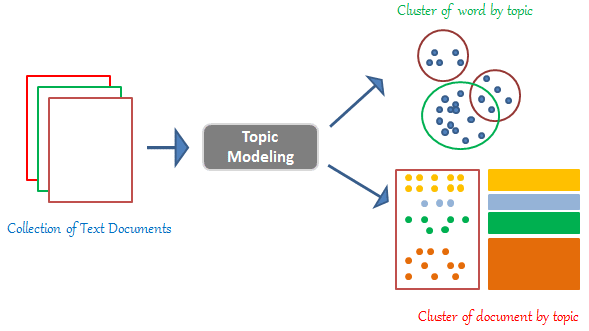

In [88]:
import pyLDAvis.gensim_models
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [89]:
rondaslda = pd.read_excel(r'C:\Users\user\Documents\ESPECIALIZACION\LNP\Archivos\Ronda.xlsx')

In [92]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    return texto

rondaslda['pre_procesamiento'] = rondaslda['LETRA'].apply(lambda texto: pre_procesado(texto))

rondaslda.head()

LETRA  \
0  Mambrú se fue a la guerra, que dolor, que dolo...   
1  En el bosque de la China, la chinita se perdió...   
2  Al pasar la barca me dijo el barquero las niña...   
3  Aserrín aserrán los maderos de San Juan piden ...   
4  lunes antes de almorzar, una niña fue a jugar ...   

                                   pre_procesamiento  
0  [mambrú, guerra, dolor, dolor, pena, mambrú, g...  
1  [chinita, perdió, andaba, perdido, encontramos...  
2  [pasar, barca, dijo, barquero, niñas, bonitas,...  
3  [aserrín, maderos, san, juan, piden, pan, dan,...  
4  [lunes, almorzar, niña, jugar, pudo, jugar, la...

In [94]:
# Crear una represantación de los documentos en forma de diccionario

dictionary = Dictionary(rondaslda['pre_procesamiento'].values)

dictionary.filter_extremes(no_below=1, no_above=0.5)

# Corpus
corpus = [dictionary.doc2bow(text) for text in rondaslda['pre_procesamiento'].values]

# Entrenar el modelo
model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 4, passes=8000)


In [95]:
lda_display = pyLDAvis.gensim_models.prepare(model, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)


# Resultado

In [96]:
model.print_topics(num_words=8)


[(0,
  '0.046*"pasar" + 0.040*"volvió" + 0.040*"barca" + 0.040*"mujer" + 0.033*"pagan" + 0.033*"dinero" + 0.033*"niñas" + 0.027*"decir"'),
 (1,
  '0.055*"dolor" + 0.032*"junto" + 0.024*"mambrú" + 0.024*"sentó" + 0.024*"luna" + 0.024*"chinita" + 0.016*"viene" + 0.016*"mire"'),
 (2,
  '0.082*"jugar" + 0.053*"piden" + 0.047*"dan" + 0.041*"niña" + 0.041*"pudo" + 0.041*"almorzar" + 0.024*"lavaba" + 0.024*"barría"'),
 (3,
  '0.020*"rompo" + 0.020*"tiro" + 0.020*"mamá" + 0.020*"pega" + 0.020*"pego" + 0.020*"rock" + 0.020*"roll" + 0.020*"dice"')]

In [97]:
def get_doc_top_n(text_processed, n):
    d = dictionary.doc2bow(text_processed)
    topics = dict(model.get_document_topics(d))
    try:
        return topics[n]
    except:
        return None
    

In [98]:
for t in range(0,4):
    top_name = f"topic_{t}"
    rondaslda[top_name] = rondaslda['pre_procesamiento'].apply(lambda doc: get_doc_top_n(doc, t))
    

In [99]:
rondaslda


LETRA  \
0  Mambrú se fue a la guerra, que dolor, que dolo...   
1  En el bosque de la China, la chinita se perdió...   
2  Al pasar la barca me dijo el barquero las niña...   
3  Aserrín aserrán los maderos de San Juan piden ...   
4  lunes antes de almorzar, una niña fue a jugar ...   
5  Arroz con leche me quiero casar con una señori...   
6  Don Federico mató a su mujer, la hizo picadill...   
7  Toño retoño mató a su mujer, con un cuchillito...   
8  Me subo a la cama, tiro mi maleta, rompo una b...   
9  Duérmete niño, duérmete ya que viene el coco y...   

                                   pre_procesamiento   topic_0   topic_1  \
0  [mambrú, guerra, dolor, dolor, pena, mambrú, g...       NaN  0.992912   
1  [chinita, perdió, andaba, perdido, encontramos...       NaN  0.991272   
2  [pasar, barca, dijo, barquero, niñas, bonitas,...  0.989837       NaN   
3  [aserrín, maderos, san, juan, piden, pan, dan,...       NaN       NaN   
4  [lunes, almorzar, niña, jugar, pudo, jugar, la...       NaN       NaN   
5  [arroz, leche, quiero, casar, señorita, ciudad...  0.010580  0.967459   
6  [don, federico, mató, mujer, hizo, picadillo, ...  0.958288  0.013896   
7  [toño, retoño, mató, mujer, cuchillito, grande...  0.946363  0.017867   
8  [subo, cama, tiro, maleta, rompo, botella, mam...  0.015632  0.015629   
9   [duérmete, niño, duérmete, viene, coco, llevará]  0.891504  0.036951   

    topic_2   topic_3  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3  0.985279       NaN  
4  0.990376       NaN  
5  0.011507  0.010454  
6  0.013899  0.013917  
7  0.017872  0.017898  
8  0.015631  0.953108  
9  0.035744  0.035798

In [106]:
d = dictionary.doc2bow(["dolor"])
topics = [(cluster[0]+1, cluster[1]) for cluster in model.get_document_topics(d)]
topics


[(1, 0.12501647), (2, 0.62492776), (3, 0.12501478), (4, 0.12504095)]

In [235]:
dictionary.token2id['jugar']


119

In [108]:
for t in range(0,4):
    print(f"{color.PURPLE}{color.BOLD}************ TEMAS {t} ************{color.END}")
    topic = f"topic_{t}"
    for i,articulo in enumerate(rondaslda.sort_values(topic, ascending=False)['LETRA'].values[:4]):
        print(f"{color.BLUE}{color.BOLD} Ronda #{i}{color.END}")
        print(articulo[:120])
        print()
    print()
    

************ TEMAS 0 ************
 Ronda #0
Al pasar la barca me dijo el barquero las niñas bonitas no pagan dinero. Yo no soy bonita ni lo quiero ser yo pago diner

 Ronda #1
Don Federico mató a su mujer, la hizo picadillo y la paso por la sartén. La gente que pasaba olía a carne humana asada, 

 Ronda #2
Toño retoño mató a su mujer, con un cuchillito más grande que él, le saco las tripitas y las puso a vender, y con esa pl

 Ronda #3
Duérmete niño, duérmete ya que viene el coco y te llevará.


************ TEMAS 1 ************
 Ronda #0
Mambrú se fue a la guerra, que dolor, que dolor, que pena. Mambrú se fue a la guerra, no sé cuándo vendrá. Do-re-mi, do-

 Ronda #1
En el bosque de la China, la chinita se perdió, como yo andaba perdido nos encontramos los dos. En el bosque de la China

 Ronda #2
Arroz con leche me quiero casar con una señorita de la ciudad Que sepa coser que sepa bordar que sepa abrir la puerta pa

 Ronda #3
Duérmete niño, duérmete ya que viene el coco y te llevará.


# Análisis de sentimiento

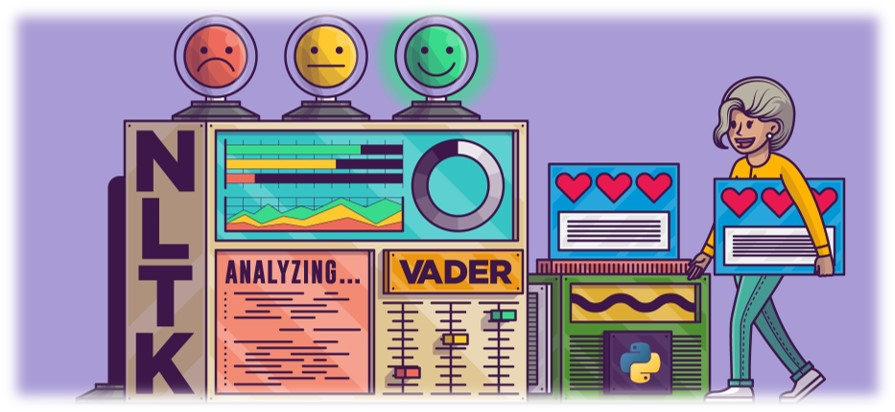

# Flair

* Modelos aprenden los embeddings para considerar las similitudes entre las palabras y hacerlos resistentes a los errores de ortografía.

In [110]:
from flair.models import TextClassifier
from flair.data import Sentence

import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [111]:
rondas2 = pd.read_excel(r'C:\Users\user\Documents\ESPECIALIZACION\LNP\Archivos\Ronda.xlsx')

In [112]:
classifier = TextClassifier.load('sentiment')


2021-06-02 22:14:08,005 loading file C:\Users\user\.flair\models\sentiment-en-mix-distillbert_4.pt


In [113]:
classifier = TextClassifier.load('sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score
rondas2['sent_flair'] = rondas2['LETRA'].apply(lambda valor: sent_flair(valor))


2021-06-02 22:14:18,614 loading file C:\Users\user\.flair\models\sentiment-en-mix-distillbert_4.pt


In [114]:
rondas2


LETRA  sent_flair
0  Mambrú se fue a la guerra, que dolor, que dolo...   -0.847371
1  En el bosque de la China, la chinita se perdió...    0.871689
2  Al pasar la barca me dijo el barquero las niña...   -0.966887
3  Aserrín aserrán los maderos de San Juan piden ...   -0.995211
4  lunes antes de almorzar, una niña fue a jugar ...    0.977147
5  Arroz con leche me quiero casar con una señori...   -0.987393
6  Don Federico mató a su mujer, la hizo picadill...    0.998931
7  Toño retoño mató a su mujer, con un cuchillito...    0.780187
8  Me subo a la cama, tiro mi maleta, rompo una b...    0.999545
9  Duérmete niño, duérmete ya que viene el coco y...    0.998150

In [116]:
rondas2['sent_flair_label'] = rondas2['sent_flair'].apply(lambda valor: 'POSITIVO' if valor >=0 else 'NEGATIVO')
rondas2['sent_flair_label'].value_counts()


POSITIVO    6
NEGATIVO    4
Name: sent_flair_label, dtype: int64

In [117]:
sentimiento = pd.DataFrame(rondas2['sent_flair_label'].value_counts()).reset_index()
sentimiento.columns = ['Sentimiento', 'Total']
sentimiento

Sentimiento  Total
0    POSITIVO      6
1    NEGATIVO      4

In [118]:
trace = go.Bar(x=sentimiento.Sentimiento.values,
               y=sentimiento.Total.values,
               marker=dict(color=["darkviolet", "darkblue"]))

layout = go.Layout(title='Sentimientos')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [119]:
rondas2[['LETRA', 'sent_flair']].sort_values('sent_flair')

LETRA  sent_flair
3  Aserrín aserrán los maderos de San Juan piden ...   -0.995211
5  Arroz con leche me quiero casar con una señori...   -0.987393
2  Al pasar la barca me dijo el barquero las niña...   -0.966887
0  Mambrú se fue a la guerra, que dolor, que dolo...   -0.847371
7  Toño retoño mató a su mujer, con un cuchillito...    0.780187
1  En el bosque de la China, la chinita se perdió...    0.871689
4  lunes antes de almorzar, una niña fue a jugar ...    0.977147
9  Duérmete niño, duérmete ya que viene el coco y...    0.998150
6  Don Federico mató a su mujer, la hizo picadill...    0.998931
8  Me subo a la cama, tiro mi maleta, rompo una b...    0.999545

In [120]:
print(f"{color.BLUE}{color.BOLD}RONDA MÁS NEGATIVA: {color.END}{rondas2.sort_values('sent_flair').iloc[0]['LETRA']}")
print()
print(f"{color.PURPLE}{color.BOLD}RONDA MÁS POSITIVA: {color.END}{rondas2.sort_values('sent_flair').iloc[-1]['LETRA']}")
print()

RONDA MÁS NEGATIVA: Aserrín aserrán los maderos de San Juan piden pan no les dan piden queso les dan hueso y se les ¡atora en el pescuezo! piden vino, si les dan se marean y se van Aserrín aserrán los maderos de San Juan piden pan no les dan piden queso les dan hueso y se les ¡atora en el pescuezo! piden vino, si les dan se marean y se van. Aserrín, aserrán, los maderos de San Juan, piden pan, no les dan, piden queso, les dan hueso piden ají, y los botan así.

RONDA MÁS POSITIVA: Me subo a la cama, tiro mi maleta, rompo una botella, mi mamá me pega, yo le pego a ella y toco un tocadiscos que dice así: Rock and Roll.



In [122]:
stopwords.extend(["Mambrú", "Do", "do", "re", "mi", "fa", "China", "china", "bosque", "Aserrín", "aserrán","así", "si", "Leía" "pío", "pa", "la", "de", "que", "y", "yo"])

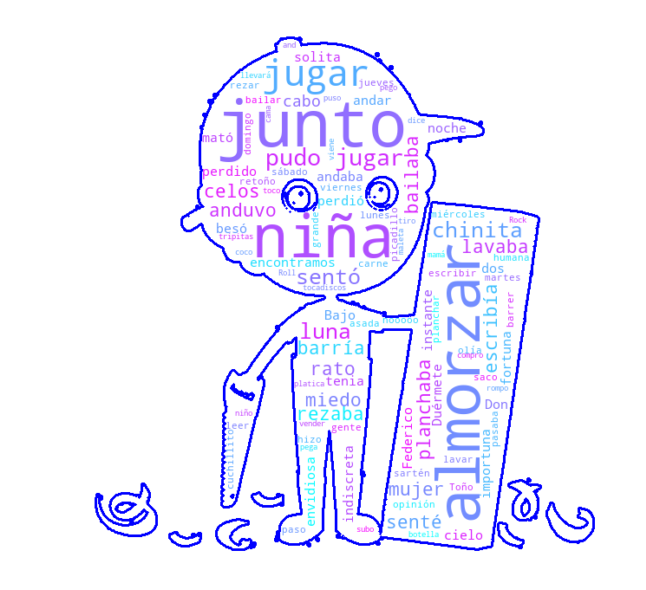

In [123]:
up = PIL.Image.open(r'C:\Users\user\Documents\ESPECIALIZACION\LNP\Archivos\Aserrin.png')
mask = np.array(up)
palabras = rondas2[rondas2['sent_flair_label']=='POSITIVO'].LETRA.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, max_font_size=150, max_words=250, background_color='white', colormap="cool", stopwords=stopwords,mask=mask, contour_width=1.3, contour_color='blue').generate(palabras) 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [162]:
stopwords.extend(["Mambrú", "Do", "do", "re", "mi", "fa", "China", "china", "bosque", "Aserrín", "aserrán","así", "si", "Leía" "pío", "pa", "la", "de", "que", "y", "yo","bonita", "se", "niñas"])

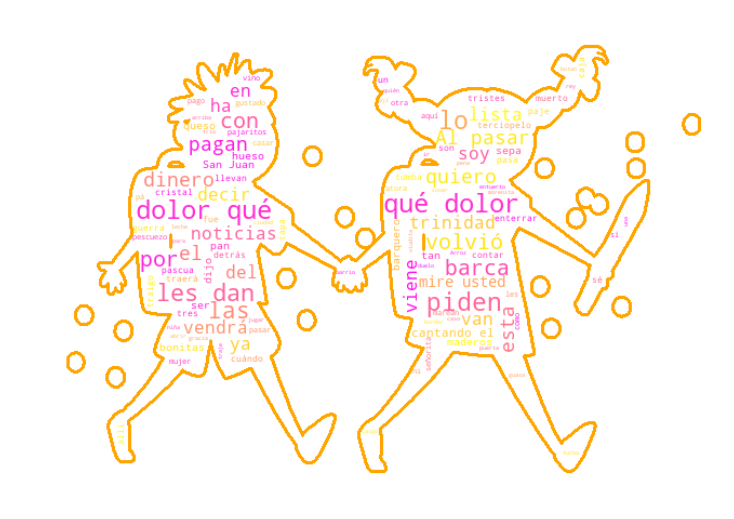

In [163]:
up = PIL.Image.open(r'C:\Users\user\Documents\ESPECIALIZACION\LNP\Archivos\Ninos.png')
mask = np.array(up)

palabras = rondas2[rondas2['sent_flair_label']=='NEGATIVO'].LETRA.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, max_font_size=150, max_words=250, background_color='white', colormap="spring",
                     stopwords=stopwords, mask=mask, contour_width=1.3, contour_color='orange').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Textblob

* Funcionan sólo en inglés
* Ofrece puntuación de subjetividad


In [129]:
data = pd.read_excel(r'C:\Users\user\Documents\ESPECIALIZACION\LNP\Archivos\Ronda.Inglés.xlsx')
data.head(2)


RONDA                                              LETRA
0      1  Mambru went to war, What grief, what grief, wh...
1      2  In a forest in China the little Chinese girl g...

In [130]:
from nltk.corpus import stopwords
stopwords = stopwords.words('ENGLISH')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [131]:
vader = SentimentIntensityAnalyzer()
data['sentimiento_vader'] = data['LETRA'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sentimiento_textblob'] = data['LETRA'].apply(lambda valor: TextBlob(valor).sentiment.polarity)
data.head(9)


RONDA                                              LETRA  \
0      1  Mambru went to war, What grief, what grief, wh...   
1      2  In a forest in China the little Chinese girl g...   
2      3  As the boat passed by, the boatman told me tha...   
3      4  They ask for bread, they don't get bread, they...   
4      8  Monday before lunch, a girl went to play but s...   
5      9  On this morning I want a wedding With a little...   
6     10  Don Federico killed his wife, made mincemeat o...   
7     11  Toño retoño killed his wife, with a knife bigg...   
8     13  I get on the bed, throw my suitcase, break a b...   

   sentimiento_vader  sentimiento_textblob  
0            -0.9988             -0.656250  
1             0.9674             -0.061069  
2             0.9788              0.132478  
3             0.0000              0.000000  
4             0.0613              0.000000  
5             0.1406             -0.093750  
6            -0.6705             -0.100000  
7            -0.6705             -0.100000  
8             0.5994              0.000000

# Librería Vader

In [132]:
pd.set_option('display.max_colwidth', None)
data[['LETRA', 'sentimiento_vader']].sort_values('sentimiento_vader')


LETRA  \
0  Mambru went to war, What grief, what grief, what sorrow, Mambru went to war, I don't know when he'll be back, Do re mi, do re fa I don't know when he'll be back. If he's back for Easter, What grief, what grief, what a grace! If he's back for Easter Or for Trinity Day, Do re mi, do re fa Or for Trinity Day. Trinity Day is over What grief, what grief, what a tease! Trinity Day is over Mambru doesn't come Do re mi, do re fa Mambru doesn't come. I've gone upstairs into the tower What grief, what grief, what continuous grief! I've gone upstairs into the tower To see if he'll come Do re mi, do re fa To see if he'll come. Here comes a Page What grief, what grief, what a suit! Here comes a Page What news will he bring? Do re mi, do re fa What news will he bring? The news I'm bringing, From the grief, from the grief I collapse The news I'm bringing, Is sad to tell Do re mi, do re fa Is sad to tell. Mambru has died What grief, what grief, how wrong! Mambru has died They take him to his grave Do re mi, do re fa They take him to his grave. In a velvet coffin What grief, what grief, what mourning! In a velvet coffin With a crystal lid Do re mi, do re fa With a crystal lid. Behind his grave What grief, what grief, what a mob! Behind his grave There are three little birds Do re mi, do re fa There are three little birds. They're singing cheep, cheep What grief, what grief, what a trio! They're singing cheep, cheep Singing cheep, chirp Do re mi, do re fa Singing cheep, chirp.   
6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Don Federico killed his wife, made mincemeat of her and put her in a frying pan. People passing by smelled human flesh was Don Federico's wife.   
7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [133]:
data['sent_Vader_label'] = data['sentimiento_vader'].apply(lambda valor: 'POSITIVO' if valor >=0 else 'NEGATIVO')

In [134]:
temp = pd.DataFrame(data['sent_Vader_label'].value_counts()).reset_index()
temp.columns = ['Sentimiento', 'Total']
temp


Sentimiento  Total
0    POSITIVO      7
1    NEGATIVO      3

In [135]:
trace = go.Bar(x=temp.Sentimiento.values,
               y=temp.Total.values,
               marker=dict(color=["darkviolet", "darkblue"]))

layout = go.Layout(title='Sentimientos')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [136]:
print(f"{color.BLUE}{color.BOLD}RONDA MÁS NEGATIVA: {color.END}{data.sort_values('sentimiento_vader').iloc[0]['LETRA']}")
print()
print(f"{color.PURPLE}{color.BOLD}RONDA MÁS POSITIVA: {color.END}{data.sort_values('sentimiento_vader').iloc[-1]['LETRA']}")
print()

RONDA MÁS NEGATIVA: Mambru went to war, What grief, what grief, what sorrow, Mambru went to war, I don't know when he'll be back, Do re mi, do re fa I don't know when he'll be back. If he's back for Easter, What grief, what grief, what a grace! If he's back for Easter Or for Trinity Day, Do re mi, do re fa Or for Trinity Day. Trinity Day is over What grief, what grief, what a tease! Trinity Day is over Mambru doesn't come Do re mi, do re fa Mambru doesn't come. I've gone upstairs into the tower What grief, what grief, what continuous grief! I've gone upstairs into the tower To see if he'll come Do re mi, do re fa To see if he'll come. Here comes a Page What grief, what grief, what a suit! Here comes a Page What news will he bring? Do re mi, do re fa What news will he bring? The news I'm bringing, From the grief, from the grief I collapse The news I'm bringing, Is sad to tell Do re mi, do re fa Is sad to tell. Mambru has died What grief, what grief, how wrong! Mambru has died They take 

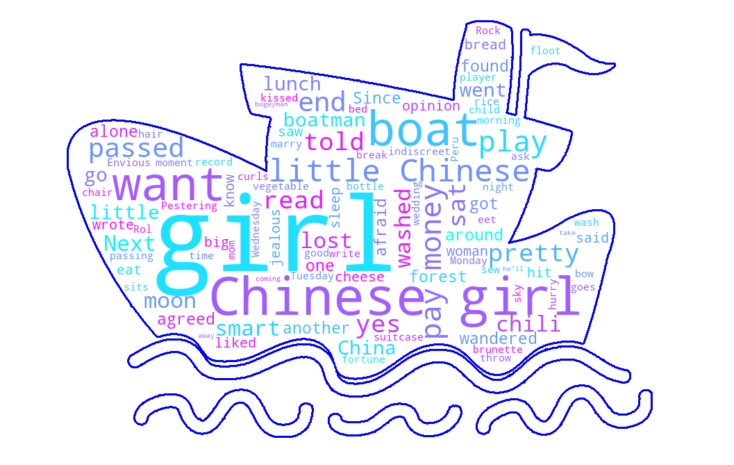

In [137]:
stopwords.extend(["get", "like","bone"])

up = PIL.Image.open(r'C:\Users\user\Documents\ESPECIALIZACION\LNP\Archivos\Barco.png')
mask = np.array(up)

palabras = data[data['sent_Vader_label']=='POSITIVO'].LETRA.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap="cool",
                     stopwords=stopwords,
                     mask=mask, contour_width=2, contour_color='blue').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


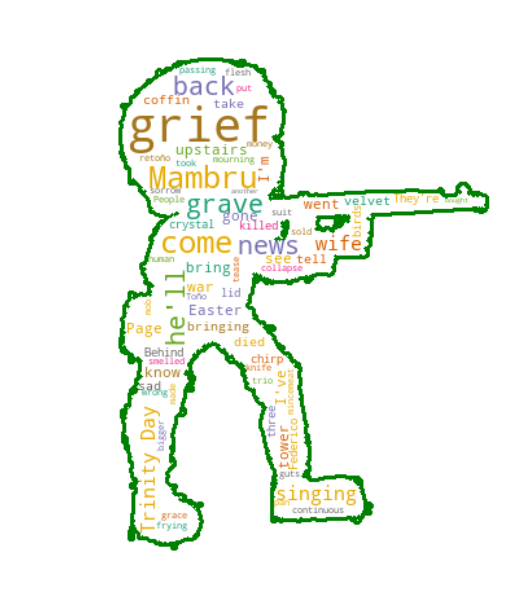

In [180]:
stopwords.extend(["mi", "fa", "cheep"])

down = PIL.Image.open(r'C:\Users\user\Documents\ESPECIALIZACION\LNP\Archivos\MAMBRU.png')
mask = np.array(down)

palabras = data[data['sent_Vader_label']=='NEGATIVO'].LETRA.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='Dark2_r',
                     stopwords=stopwords,
                     mask=mask, contour_width=1.1, contour_color='Green').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# Librería textblob

In [138]:
pd.set_option('display.max_colwidth', None)
data[['LETRA', 'sentimiento_textblob']].sort_values('sentimiento_textblob')


LETRA  \
0  Mambru went to war, What grief, what grief, what sorrow, Mambru went to war, I don't know when he'll be back, Do re mi, do re fa I don't know when he'll be back. If he's back for Easter, What grief, what grief, what a grace! If he's back for Easter Or for Trinity Day, Do re mi, do re fa Or for Trinity Day. Trinity Day is over What grief, what grief, what a tease! Trinity Day is over Mambru doesn't come Do re mi, do re fa Mambru doesn't come. I've gone upstairs into the tower What grief, what grief, what continuous grief! I've gone upstairs into the tower To see if he'll come Do re mi, do re fa To see if he'll come. Here comes a Page What grief, what grief, what a suit! Here comes a Page What news will he bring? Do re mi, do re fa What news will he bring? The news I'm bringing, From the grief, from the grief I collapse The news I'm bringing, Is sad to tell Do re mi, do re fa Is sad to tell. Mambru has died What grief, what grief, how wrong! Mambru has died They take him to his grave Do re mi, do re fa They take him to his grave. In a velvet coffin What grief, what grief, what mourning! In a velvet coffin With a crystal lid Do re mi, do re fa With a crystal lid. Behind his grave What grief, what grief, what a mob! Behind his grave There are three little birds Do re mi, do re fa There are three little birds. They're singing cheep, cheep What grief, what grief, what a trio! They're singing cheep, cheep Singing cheep, chirp Do re mi, do re fa Singing cheep, chirp.   
6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Don Federico killed his wife, made mincemeat of her and put her in a frying pan. People passing by smelled human flesh was Don Federico's wife.   
7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [139]:
data['sent_text_label'] = data['sentimiento_textblob'].apply(lambda valor: 'POSITIVO' if valor >=0 else 'NEGATIVO')
data['sent_text_label'].value_counts()


POSITIVO    5
NEGATIVO    5
Name: sent_text_label, dtype: int64

In [140]:
sentimiento1 = pd.DataFrame(data['sent_text_label'].value_counts()).reset_index()
sentimiento1.columns = ['Sentimiento', 'Total']
sentimiento1


Sentimiento  Total
0    POSITIVO      5
1    NEGATIVO      5

In [141]:
trace = go.Bar(x=sentimiento1.Sentimiento.values,
               y=sentimiento1.Total.values,
               marker=dict(color=["darkviolet", "darkblue"]))

layout = go.Layout(title='Sentimientos')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [142]:
print(f"{color.BLUE}{color.BOLD}RONDA MÁS NEGATIVA: {color.END}{data.sort_values('sentimiento_textblob').iloc[0]['LETRA']}")
print()
print(f"{color.PURPLE}{color.BOLD}RONDA MÁS POSITIVA: {color.END}{data.sort_values('sentimiento_textblob').iloc[-1]['LETRA']}")
print()


RONDA MÁS NEGATIVA: Mambru went to war, What grief, what grief, what sorrow, Mambru went to war, I don't know when he'll be back, Do re mi, do re fa I don't know when he'll be back. If he's back for Easter, What grief, what grief, what a grace! If he's back for Easter Or for Trinity Day, Do re mi, do re fa Or for Trinity Day. Trinity Day is over What grief, what grief, what a tease! Trinity Day is over Mambru doesn't come Do re mi, do re fa Mambru doesn't come. I've gone upstairs into the tower What grief, what grief, what continuous grief! I've gone upstairs into the tower To see if he'll come Do re mi, do re fa To see if he'll come. Here comes a Page What grief, what grief, what a suit! Here comes a Page What news will he bring? Do re mi, do re fa What news will he bring? The news I'm bringing, From the grief, from the grief I collapse The news I'm bringing, Is sad to tell Do re mi, do re fa Is sad to tell. Mambru has died What grief, what grief, how wrong! Mambru has died They take 

In [143]:
stopwords.extend(["get", "like"])

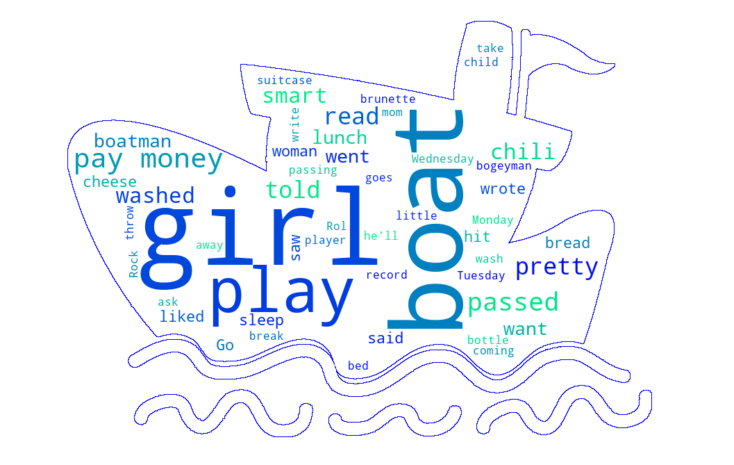

In [144]:
up = PIL.Image.open(r"C:\Users\user\Documents\ESPECIALIZACION\LNP\Archivos\Barco.png")
mask = np.array(up)
palabras = data[data['sent_text_label']=='POSITIVO'].LETRA.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, max_font_size=150, max_words=250, background_color='white', colormap='winter',
                     stopwords=stopwords, mask=mask, contour_width=0.5, contour_color='blue').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [145]:
stopwords.extend(["mi", "fa", "cheep", "yes", "little", "end"])

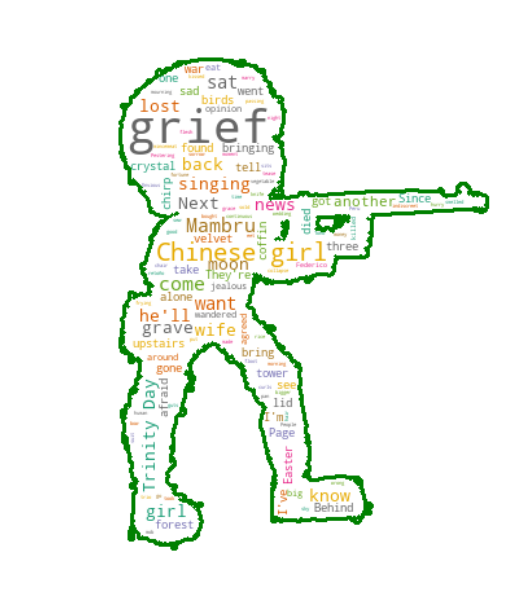

In [184]:
down = PIL.Image.open(r"C:\Users\user\Documents\ESPECIALIZACION\LNP\Archivos\MAMBRU.png")
mask = np.array(down)
palabras = data[data['sent_text_label']=='NEGATIVO'].LETRA.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, max_font_size=150, max_words=250, background_color='white', colormap='Dark2_r', stopwords=stopwords, mask=mask, contour_width=1.1, contour_color='Green').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [1]:
from IPython.display import Audio
Audio('audio.wav')


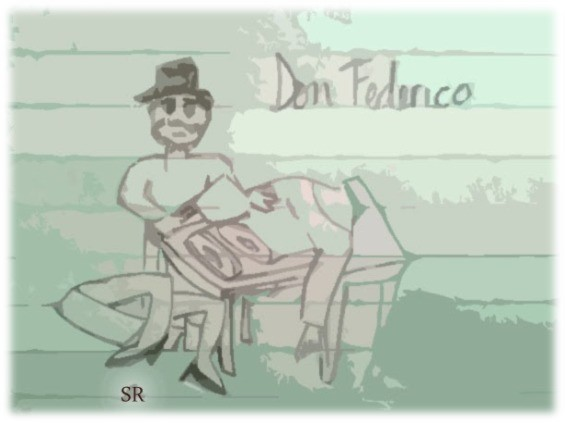